# Assignment: Working with Data

>Using the data below, answer the following questions:

>1) Which entities (top 5) had the largest population density in 2020?
>2) Which entities have more water area than land area?
>3) Which entities increased in population the most in the last 10 years?
>4) What state bird accounts for the largest population as of 2020? Land area?
>5) How many entities' largest city is their capital city?
>6) Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [1]:
import pandas as pd

In [2]:
facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
facts.head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198956.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32197.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1660272,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197881,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0


1) largest population density of 2020

In [3]:
facts[['State','Pop_2020','Area_land']]
facts['popden'] = facts['Pop_2020']/facts['Area_land']
facts.sort_values(by='popden',ascending = False, inplace=True)
facts[['State','Pop_2020','Area_land','popden']].head(5)

,State,Pop_2020,Area_land,popden
9,District of Columbia,689545.0,158,4364.208861
32,New Jersey,9288994.0,19047,487.688035
43,Rhode Island,1097379.0,2678,409.775579
42,Puerto Rico,3285874.0,8868,370.531574
23,Massachusetts,7029917.0,20202,347.981239


2) More land than water

In [4]:
facts[(facts['Area_water'] > facts['Area_land'])]

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,popden
48,United States Virgin Islands,1898,348,1550,106235.0,106405,1*,California gull,Yellow Elder,United in Pride and Hope,...,18481,Sion Farm3,13003.0,Northside3,10049.0,East End3,5128.0,Southcentral3,3277.0,305.272989
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0,249.681818
12,Guam,1478,543,935,168.4,159358,1*,Guam rail (ko'ko'),Bougainvillea spectabilis,Where America's Day Begins,...,44943,Yigo,20539.0,Tamuning,19685.0,Mangilao,15191.0,Barrigada,8875.0,0.310129
37,Northern Mariana Islands,5117,472,4644,51.0,53883,1*,Mariana fruit-dove,Flores mayo,NaN,...,48220,Tinian2,3136.0,Rota2,2527.0,Northern Islands2,0.0,NaN,NaN,0.108051


3) Entities with increase in population the most in the last 10 years

In [21]:
facts['increase'] = facts['Pop_2020'] - facts['Pop_2010']
facts.sort_values(by='increase',ascending = False, inplace=True)
facts[['State','Pop_2020','Pop_2010','increase']].head()

,State,Pop_2020,Pop_2010,increase
47,Texas,29145505.0,25145561,3999944.0
10,Florida,21538187.0,18801310,2736877.0
5,California,39538223.0,37253956,2284267.0
11,Georgia,10711908.0,9687653,1024255.0
52,Washington,7705281.0,6724540,980741.0


4) state bird accounts for the largest population as of 2020? Land area?

In [22]:
#population
facts.sort_values(by='Pop_2020',ascending = False,inplace=True)
facts[['Pop_2020','State_bird']].head(1)

,Pop_2020,State_bird
5,39538223.0,California quail


In [23]:
#land area
facts.sort_values(by='Area_land',ascending = False,inplace=True)
facts[['State_bird','Area_land']].head(1)

,State_bird,Area_land
1,Willow ptarmigan,1477953


5) How many entities' largest city is their capital city?


In [24]:
facts.columns
sum(facts['Capital_pop'] == facts['city_1_pop'])

3

6) Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [25]:
facts['percent_drop'] = 100*(facts['city_1_pop']-facts['city_5_pop'])/facts['city_1_pop']
facts.sort_values(by='percent_drop',ascending = False,inplace=True)
facts[['State','city_1_pop','city_5_pop','percent_drop']].head(1)

,State,city_1_pop,city_5_pop,percent_drop
34,New York,8879928,142749.0,98.392453


>Using the "state_dates.tsv" data, answer the remaining questions. You will need to merge the two data sets together:

>7) Of the states that joined the United States before 1790, what is the most common state flower?
>8) Which has the larger population density, the most dense US Territory or the least dense state?
>9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
>10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

Hint: `pd.read_csv('../data/state_dates.tsv',delimiter="\t")`

Hint: You likely want to convert the Date column to datetime. You might have to correct errors in the data as well.

Hint: `states['Date']<pd.datetime(1790,1,1)`

Hint: `pd.merge(****,****,left_on='USPS_code',right_on='Abbreviation',how='outer')`

In [6]:
new = pd.read_csv('../data/state_dates.tsv',delimiter="\t")
new.head(5)

,Name,Date,Status,Abbreviation
0,Alabama,"December 14, 1819",State,AL
1,Alaska,"January 3, 1959",State,AK
2,American Samoa,"April 17, 1900",Territory,AS
3,Arizona,"February 14, 1912",State,AZ
4,Arkansas,"June 15, 1836",State,AR


In [7]:
#merge the 2 datasets
newdataset = pd.merge(facts,new,left_on='USPS_code',right_on='Abbreviation',how='outer')
newdataset

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,popden,Name,Date,Status,Abbreviation
0,District of Columbia,177,158,19,689545.0,601723,1*,Wood thrush,American Beauty Rose,Justitia Omnibus,...,NaN,NaN,NaN,NaN,NaN,4364.208861,District of Columbia,"February 21, 1871",Federal District,DC
1,New Jersey,22591,19047,3544,9288994.0,8791894,12,Eastern goldfinch (American goldfinch),Violet,Liberty and Prosperity,...,145627.0,Elizabeth,128885.0,Edison,100008.0,487.688035,New Jersey,"December 18, 1787",State,NJ
2,Rhode Island,4001,2678,1324,1097379.0,1052567,2,Rhode Island Red,Violet,Hope,...,80847.0,Pawtucket,71847.0,East Providence,47476.0,409.775579,Rhode Island,"May 29, 1790",State,RI
3,Puerto Rico,13791,8868,4924,3285874.0,3725789,1*,None,Flor de Maga,Joannes Est Nomen Eius,...,147661.0,Ponce,133191.0,Caguas,124434.0,370.531574,Puerto Rico,"April 11, 1899",Territory,PR
4,Massachusetts,27336,20202,7134,7029917.0,6547629,9,Black-capped chickadee,Mayflower,Ense petit placidam sub libertate quietem,...,155032.0,Cambridge,118977.0,Lowell,111670.0,347.981239,Massachusetts,"February 6, 1788",State,MA
5,United States Virgin Islands,1898,348,1550,106235.0,106405,1*,California gull,Yellow Elder,United in Pride and Hope,...,10049.0,East End3,5128.0,Southcentral3,3277.0,305.272989,United States Virgin Islands,"March 31, 1917",Territory,VI
6,Connecticut,14357,12542,1816,3605944.0,3574097,5,American robin,Mountain laurel,Qui transtulit sustinet,...,129775.0,Hartford,122587.0,Waterbury,108093.0,287.509488,Connecticut,"January 9, 1788",State,CT
7,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0,249.681818,American Samoa,"April 17, 1900",Territory,AS
8,Maryland,32131,25142,6990,6177224.0,5773552,8,Baltimore oriole,Black-eyed susan,"Fatti maschi, parole femmine / Scuto bonae vol...",...,91347.0,Silver Spring,83267.0,Waldorf,78904.0,245.693421,Maryland,"April 28, 1788",State,MD
9,Delaware,6446,5047,1399,989948.0,897934,1,Delaware Blue Hen,Peach blossom,Liberty and independence,...,33673.0,Middletown,22582.0,Smyrna,11580.0,196.145829,Delaware,"December 7, 1787",State,DE


7) Of the states that joined the United States before 1790, what is the most common state flower? 

In [8]:
newdataset['Year'] = pd.to_datetime(newdataset['Date'],errors='raise')
#len(newdataset)
new1 = newdataset[newdataset['Year'] < pd.datetime(1790,1,1)]
new1['State_flower'].value_counts().head(1)

Mountain laurel    2
Name: State_flower, dtype: int64

8) Which has the larger population density, the most dense US Territory or the least dense state? 

In [9]:
#US Terriroy with highest popden
temp = newdataset[newdataset['Status'].str.contains('Territory')]
temp[['State','popden','Status']].head(1)

,State,popden,Status
3,Puerto Rico,370.531574,Territory


In [10]:
#US state with least popden
temp1 = newdataset[newdataset['Status'].str.contains('State')]
temp1[['State','popden']].sort_values(by='popden',ascending = True).head(1)

,State,popden
53,Alaska,0.496221


Most dense US Territory has the larger population density

In [11]:
# Sample code to help with the plots

#import matplotlib as plt
#%config InlineBackend.figure_format ='retina' #This makes your plot clearer


#plot = *your df by date*[[*column*,'Abbreviation']].plot(kind='bar',figsize=(10,4))
#plot.set_xticklabels(*your df by date*['Abbreviation']);

9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black

In [12]:
import matplotlib as plt
%config InlineBackend.figure_format ='retina' #This makes your plot clearer
plot = newdataset[['city_1_pop','Abbreviation']].plot(kind='bar',color=['black'],figsize=(10,4))
plot.set_xticklabels(newdataset['Abbreviation']);
plot

10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

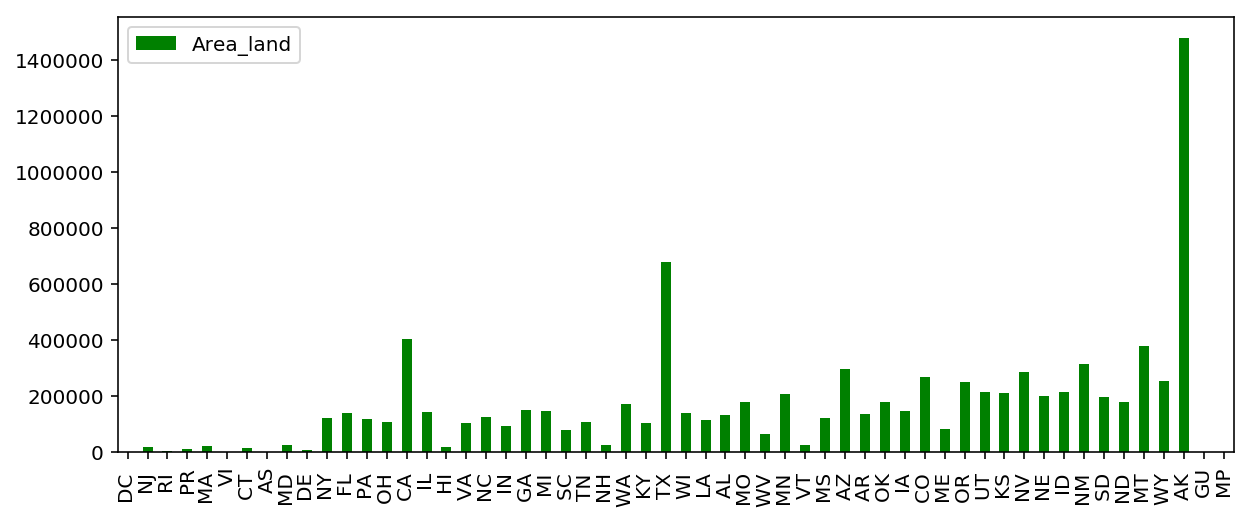

In [13]:
#land area
%config InlineBackend.figure_format ='retina' #This makes your plot clearer
plot = newdataset[['Area_land','Abbreviation']].plot(kind='bar',color=['green'],figsize=(10,4))
plot.set_xticklabels(newdataset['Abbreviation']);
plot

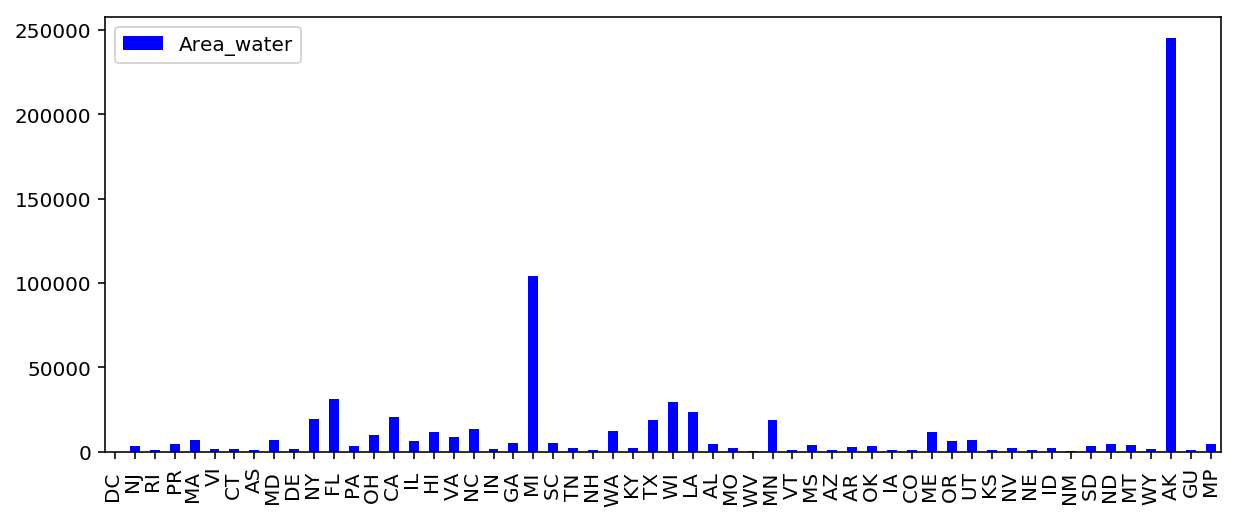

In [14]:
%config InlineBackend.figure_format ='retina' #This makes your plot clearer
plot = newdataset[['Area_water','Abbreviation']].plot(kind='bar',color=['blue'],figsize=(10,4))
plot.set_xticklabels(newdataset['Abbreviation']);
plot